> Trabajo del grupo 1 de Introducción al Aprendizaje Automático
>
> Miembros: Damián Campana, Daniel Peralta, Fernando Fontana, Gaspar García Bazán, Javier Gallo, Mauro Paris.

# Laboratorio 2: Armado de un esquema de aprendizaje automático


In [2]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

from utils import display_markdown

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas).
Estos serán los que se trabajarán en el resto del laboratorio.


In [3]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

RANDOM_STATE_SEED = 42


## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?


### Respuestas:

**1.** El conjunto de datos contiene información de préstamos hipotecarios. Cada fila del conjunto representa un préstamo.

**2.** La variable objetivo es la variable binaria `TARGET`. Determina si el aplicante al préstamo tuvo problemas para pagar (o nunca pudo pagar, `TARGET=1`) o pagó a término (`TARGET=0`).

**3.** Tenemos los siguientes atributos para hacer la predicción:

- _LOAN_: Monto solicitado por el aplicante.
- _MORTDUE_: Monto que adeuda de la hipoteca actual.
- _VALUE_: Valor de la propiedad actual.
- _YOJ_: Años que lleva en el trabajo actual.
- _DEROG_: Número de informes muy desfavorables.
- _DELINQ_: Número de líneas de crédito morosas.
- _CLAGE_: Cantidad de meses desde la última transacción.
- _NINQ_: Número de líneas de crédito recientes.
- _CLNO_: Número de líneas de crédito.
- _DEBTINC_: Ratio de deuda a salario.

**4.** Creemos que `DELINQ`, `DEBTINC` y `LOAN` deben ser los que más afecten al
resultado.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir
 la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html



## Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión
 de scikit-learn para todos los parámetros. Únicamente **fijar la semilla
  aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de
 **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


- La métrica __accuracy__ representa el ratio entre predicciones correctas y total de predicciones (o tamaño del conjunto de entrenamiento). Esta medida funciona bien si existe una cantidad relativamente equivalente de entradas pertenecientes a cada clase, en caso contrario no será confiable o representativo. Esto puede verse por ejemplo en un caso donde el 98% de las entradas del conjunto de entrenamiento son negativas (en contraposición a positivas). En tal situación un modelo que realice todas predicciones negativas tendrá un accuracy de 98%. Si se tratara de un diagnóstico médico, confiar en un modelo que predice de esta forma sería un grave error en tanto existirán dos falsos negativos cuya salud podrá verse comprometida.


- Por un lado, __Recall__ o _True Positive Rate_ se define como la proporción entre verdaderos positivos (predicciones positivas correctas) y el total de positivos en la muestra (Verdaderos Positivos + Falsos Negativos). Por otro lado __Precision__ se define como la proporción entre verdaderos positivos y el total de predicciones postivas (verdaderos positivos + Falsos Positivos).
En general, existe un trade-off entre Recall y Precision. Si todas las predicciones son positivas tendré una tasa de Recall de 100%. Sin embargo, esto afectaría la precision en tanto incrementaría la cantidad de falsos positivos.


- La medida __F1__ es la media armónica entre _Recall_ y _Precision_. Se basa en la idea del trade-off entre estas métricas anteriormente mencionado. Mientras más cerca de 1 se encuentre F1 mejor será el desempeño del modelo.

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(random_state=RANDOM_STATE_SEED)
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
train_y_pred = clf.predict(X_train)


In [5]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

display_markdown('### Train metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_train, train_y_pred)}')
display_markdown(f'* Precision Score: {precision_score(y_train, train_y_pred)}')
display_markdown(f'* Recall Score: {recall_score(y_train, train_y_pred)}')
display_markdown(f'* F1 Score: {f1_score(y_train, train_y_pred)}')

display_markdown('### Test metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_test, y_pred)}')
display_markdown(f'* Precision Score: {precision_score(y_test, y_pred)}')
display_markdown(f'* Recall Score: {recall_score(y_test, y_pred)}')
display_markdown(f'* F1 Score: {f1_score(y_test, y_pred)}')


### Train metrics

* Accuracy Score: 0.8260283209710048

* Precision Score: 0.4768211920529801

* Recall Score: 0.2868525896414343

* F1 Score: 0.35820895522388063

### Test metrics

* Accuracy Score: 0.8194070080862533

* Precision Score: 0.3783783783783784

* Recall Score: 0.2413793103448276

* F1 Score: 0.29473684210526313

In [6]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

display_markdown('### Confusion Matrix')
display_markdown(f'* True Negative: {tn}')
display_markdown(f'* False Positive: {fp}')
display_markdown(f'* False Negative: {fn}')
display_markdown(f'* True Positive: {tp}')

### Confusion Matrix

* True Negative: 290

* False Positive: 23

* False Negative: 44

* True Positive: 14

## Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier.
Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento
y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de
entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de
**entrenamiento** y sobre el conjunto de **evaluación**, reportando:

- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [7]:
from sklearn.model_selection import GridSearchCV


model_grid_sgd = SGDClassifier(random_state=42)

grid_values = {
    "loss": ["hinge", "log", "perceptron", "huber", "squared_hinge", "modified_huber"], 
    "penalty" : ["l2", "l1", "elasticnet"], 
    "learning_rate" : ["constant","optimal","invscaling","adaptive"],
    "eta0" : [0.1,0.25,0.5,1],
    "max_iter": [1500],
}
grid_clf_sgd = GridSearchCV(
    model_grid_sgd, scoring= "accuracy",
    param_grid = grid_values, cv=5
)
grid_clf_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'eta0': [0.1, 0.25, 0.5, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log', 'perceptron', 'huber',
                                  'squared_hinge', 'modified_huber'],
                         'max_iter': [1500],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [8]:
results_sgd = grid_clf_sgd.cv_results_
df_sgd = pd.DataFrame(results_sgd)

df_sgd[["param_loss", "param_penalty", 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values("rank_test_score")

,param_loss,param_penalty,mean_test_score,std_test_score,rank_test_score
252,hinge,l2,0.830749,0.001259,1
44,perceptron,elasticnet,0.830749,0.001259,1
38,hinge,elasticnet,0.830749,0.001259,1
258,perceptron,l2,0.830749,0.001259,1
192,squared_hinge,l2,0.830749,0.001259,1
...,...,...,...,...,...
11,huber,elasticnet,0.306629,0.260965,284
227,huber,elasticnet,0.304607,0.263540,285
9,huber,l2,0.301242,0.260166,286
189,huber,l2,0.300332,0.261999,287


In [15]:
sgd_bestModel = grid_clf_sgd.best_estimator_
sgd_bestModel

SGDClassifier(eta0=0.1, learning_rate='invscaling', max_iter=1500,
              penalty='elasticnet', random_state=42)

In [17]:
#Operando con el mejor modelo
sgd_clf_best = make_pipeline(StandardScaler(), sgd_bestModel)

In [20]:
#Entreno BEST Model
sgd_clf_best.fit(X_train, y_train)

#Predict values based on best parameters
y_pred_best = sgd_clf_best.predict(X_test)
train_y_pred_best = clf.predict(X_train)


display_markdown('### Train metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_train, train_y_pred_best)}')
display_markdown(f'* Precision Score: {precision_score(y_train, train_y_pred_best)}')
display_markdown(f'* Recall Score: {recall_score(y_train, train_y_pred_best)}')
display_markdown(f'* F1 Score: {f1_score(y_train, train_y_pred_best)}')

# New Model Evaluation metrics
display_markdown('### Test metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_test, y_pred_best)}')
display_markdown(f'* Precision Score: {precision_score(y_test, y_pred_best)}')
display_markdown(f'* Recall Score: {recall_score(y_test, y_pred_best)}')
display_markdown(f'* F1 Score: {f1_score(y_test, y_pred_best)}')

### Train metrics

* Accuracy Score: 0.8260283209710048

* Precision Score: 0.4768211920529801

* Recall Score: 0.2868525896414343

* F1 Score: 0.35820895522388063

### Test metrics

* Accuracy Score: 0.8840970350404312

* Precision Score: 1.0

* Recall Score: 0.25862068965517243

* F1 Score: 0.4109589041095891

Se puede observar que la medida F1 pasa de 0.29 en el modelo por default(`learning_rate= optimal, loss function = hinge, penalty= L2`) a 0.41 en el mejor modelo de esta grilla (`loss function = hinge, learning rate = invscaling, penalty= elasticnet`). A su vez, el accuracy score mejora desde 0.81 a 0.88.

# Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable
objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


## Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores
 por omisión de scikit-learn para todos los parámetros. Únicamente
  **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de
**evaluación**, reportando:

- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [23]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

y_test_pred_tree = clf_tree.predict(X_test)
y_train_pred_best = clf_tree.predict(X_train)


In [24]:
display_markdown('### Train metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_train, y_train_pred_best)}')
display_markdown(f'* Precision Score: {precision_score(y_train, y_train_pred_best)}')
display_markdown(f'* Recall Score: {recall_score(y_train, y_train_pred_best)}')
display_markdown(f'* F1 Score: {f1_score(y_train, y_train_pred_best)}')

# New Model Evaluation metrics
display_markdown('### Test metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_test, y_test_pred_tree)}')
display_markdown(f'* Precision Score: {precision_score(y_test, y_test_pred_tree)}')
display_markdown(f'* Recall Score: {recall_score(y_test, y_test_pred_tree)}')
display_markdown(f'* F1 Score: {f1_score(y_test, y_test_pred_tree)}')

### Train metrics

* Accuracy Score: 1.0

* Precision Score: 1.0

* Recall Score: 1.0

* F1 Score: 1.0

### Test metrics

* Accuracy Score: 0.8867924528301887

* Precision Score: 0.6428571428571429

* Recall Score: 0.6206896551724138

* F1 Score: 0.6315789473684211

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

display_markdown('### Confusion Matrix')
display_markdown(f'* True Negative: {tn}')
display_markdown(f'* False Positive: {fp}')
display_markdown(f'* False Negative: {fn}')
display_markdown(f'* True Positive: {tp}')


### Confusion Matrix

* True Negative: 293

* False Positive: 20

* False Negative: 22

* True Positive: 36

In [29]:
display_markdown(f'* Tree depth: {clf_tree.get_depth()}')

* Tree depth: 22


## Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del
DecisionTreeClassifier. Como mínimo, probar diferentes criterios de
partición (criterion), profundidad máxima del árbol (max_depth), y
cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el
conjunto de entrenamiento para explorar muchas combinaciones
posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto
de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:

- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [51]:
param_grid_tree = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4]
}

clf_tree = DecisionTreeClassifier(random_state=42)

In [36]:
grid_tree = GridSearchCV(clf_tree, param_grid_tree, scoring='accuracy', cv=5)
grid_tree.fit(X_train, y_train);

In [37]:
results = grid_tree.cv_results_

df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', "param_min_samples_split", 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,std_test_score,rank_test_score
0,gini,1,2,0.869194,0.009254,22
1,gini,1,3,0.869194,0.009254,22
2,gini,1,4,0.869194,0.009254,22
3,gini,2,2,0.871888,0.007575,19
4,gini,2,3,0.871888,0.007575,19
5,gini,2,4,0.871888,0.007575,19
6,gini,3,2,0.877955,0.010041,5
7,gini,3,3,0.877955,0.010041,5
8,gini,3,4,0.877955,0.010041,5
9,gini,4,2,0.877955,0.015399,3


In [38]:
tree_best_model = grid_tree.best_estimator_

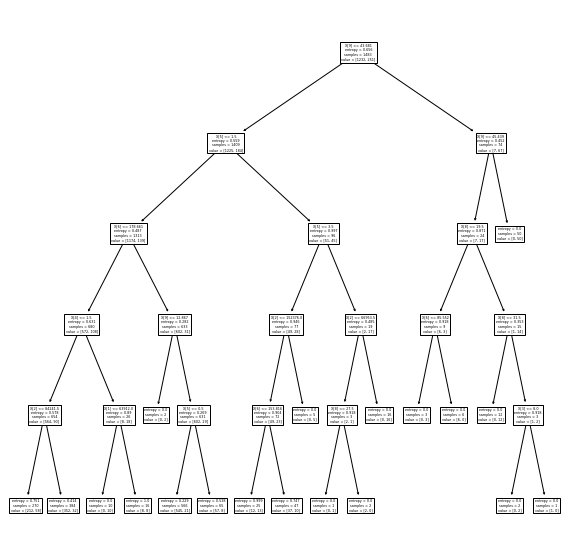

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 10))
plot_tree(tree_best_model);

In [41]:
tree_best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [45]:
bestTree_y_pred_test = tree_best_model.predict(X_test)
bestTree_y_pred_train = tree_best_model.predict(X_train)

In [47]:
display_markdown('### Train metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_train, bestTree_y_pred_train)}')
display_markdown(f'* Precision Score: {precision_score(y_train, bestTree_y_pred_train)}')
display_markdown(f'* Recall Score: {recall_score(y_train, bestTree_y_pred_train)}')
display_markdown(f'* F1 Score: {f1_score(y_train, bestTree_y_pred_train)}')

display_markdown('### Test metrics')
display_markdown(f'* Accuracy Score: {accuracy_score(y_test, bestTree_y_pred_test)}')
display_markdown(f'* Precision Score: {precision_score(y_test, bestTree_y_pred_test)}')
display_markdown(f'* Recall Score: {recall_score(y_test, bestTree_y_pred_test)}')
display_markdown(f'* F1 Score: {f1_score(y_test, bestTree_y_pred_test)}')

### Train metrics

* Accuracy Score: 0.899527983816588

* Precision Score: 0.9047619047619048

* Recall Score: 0.4541832669322709

* F1 Score: 0.6047745358090186

### Test metrics

* Accuracy Score: 0.889487870619946

* Precision Score: 0.7931034482758621

* Recall Score: 0.39655172413793105

* F1 Score: 0.5287356321839081

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, bestTree_y_pred_test).ravel()

display_markdown('### Confusion Matrix')
display_markdown(f'* True Negative: {tn}')
display_markdown(f'* False Positive: {fp}')
display_markdown(f'* False Negative: {fn}')
display_markdown(f'* True Positive: {tp}')

### Confusion Matrix

* True Negative: 307

* False Positive: 6

* False Negative: 35

* True Positive: 23

Como conslusión puede decirse que, fijando __5__ como máxima profundidad y utilizando entropía como criterio de decisión, el accuracy score (`0.8894`) supera el del modelo por default (`0.8867`) el cual tiene una profundidad de __22__ y utiliza el índice Gini como criterio de decisión. Por otro lado, se observa una reducción de F1 score de alrededor de 10 puntos porcentuales.